# Data Exploration

In [4]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings('ignore')

from tqdm import tqdm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import IsolationForest, RandomForestRegressor,GradientBoostingRegressor, HistGradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

ModuleNotFoundError: No module named 'catboost'

In [ ]:
df=pd.read_csv(r"train.csv")

In [ ]:
df

,Unnamed: 0,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,1004387,P00010942,F,18-25,4,B,0,0,1,2.0,6.0,3862
1,1,1005848,P00183342,M,51-55,20,A,0,1,5,15.0,18.0,5339
2,2,1004387,P00008142,F,18-25,4,B,0,0,8,NaN,NaN,10078
3,3,1000220,P00110942,M,26-35,12,A,3,0,1,2.0,NaN,19493
4,4,1004808,P00010542,M,36-45,0,A,1,1,2,4.0,5.0,3361
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,1003648,P00035542,M,18-25,4,B,1,0,3,4.0,12.0,8197
19996,19996,1000092,P00322342,F,18-25,4,B,1,0,5,14.0,NaN,1874
19997,19997,1005843,P00183042,M,36-45,1,C,2,0,15,16.0,NaN,4412
19998,19998,1000355,P00036742,M,18-25,3,B,2,0,1,16.0,NaN,19250


In [ ]:
df.head()

,Unnamed: 0,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,1004387,P00010942,F,18-25,4,B,0,0,1,2.0,6.0,3862
1,1,1005848,P00183342,M,51-55,20,A,0,1,5,15.0,18.0,5339
2,2,1004387,P00008142,F,18-25,4,B,0,0,8,NaN,NaN,10078
3,3,1000220,P00110942,M,26-35,12,A,3,0,1,2.0,NaN,19493
4,4,1004808,P00010542,M,36-45,0,A,1,1,2,4.0,5.0,3361


In [ ]:
df.tail()

,Unnamed: 0,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
19995,19995,1003648,P00035542,M,18-25,4,B,1,0,3,4.0,12.0,8197
19996,19996,1000092,P00322342,F,18-25,4,B,1,0,5,14.0,NaN,1874
19997,19997,1005843,P00183042,M,36-45,1,C,2,0,15,16.0,NaN,4412
19998,19998,1000355,P00036742,M,18-25,3,B,2,0,1,16.0,NaN,19250
19999,19999,1004022,P00346542,M,36-45,14,B,1,1,10,13.0,16.0,14119


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  20000 non-null  int64  
 1   User_ID                     20000 non-null  int64  
 2   Product_ID                  20000 non-null  object 
 3   Gender                      20000 non-null  object 
 4   Age                         20000 non-null  object 
 5   Occupation                  20000 non-null  int64  
 6   City_Category               20000 non-null  object 
 7   Stay_In_Current_City_Years  20000 non-null  object 
 8   Marital_Status              20000 non-null  int64  
 9   Product_Category_1          20000 non-null  int64  
 10  Product_Category_2          13703 non-null  float64
 11  Product_Category_3          6120 non-null   float64
 12  Purchase                    20000 non-null  int64  
dtypes: float64(2), int64(6), object

In [ ]:
df.describe()

,Unnamed: 0,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.00000,13703.000000,6120.000000,20000.000000
mean,9999.500000,1.003032e+06,8.059750,0.405950,5.38475,9.780194,12.539869,9289.514200
std,5773.647028,1.727468e+03,6.513732,0.491087,3.92632,5.109685,4.148972,5017.016792
min,0.000000,1.000002e+06,0.000000,0.000000,1.00000,2.000000,3.000000,12.000000
25%,4999.750000,1.001530e+06,2.000000,0.000000,1.00000,5.000000,9.000000,5839.000000
50%,9999.500000,1.003080e+06,7.000000,0.000000,5.00000,9.000000,14.000000,8066.000000
75%,14999.250000,1.004482e+06,14.000000,1.000000,8.00000,15.000000,16.000000,12056.000000
max,19999.000000,1.006040e+06,20.000000,1.000000,20.00000,18.000000,18.000000,23961.000000


In [ ]:
df.isnull().sum().reset_index()

,index,0
0,Unnamed: 0,0
1,User_ID,0
2,Product_ID,0
3,Gender,0
4,Age,0
5,Occupation,0
6,City_Category,0
7,Stay_In_Current_City_Years,0
8,Marital_Status,0
9,Product_Category_1,0


In [ ]:
df.shape

(20000, 13)

<Axes: >

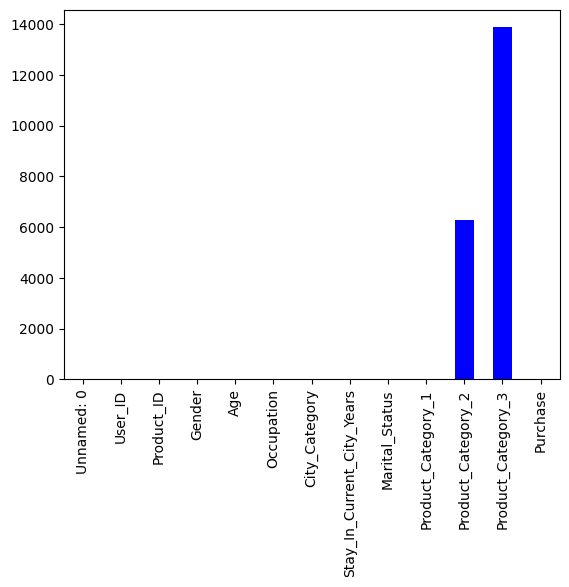

In [ ]:
df.isnull().sum().plot(kind='bar', color='blue')

<Axes: xlabel='Gender', ylabel='Count'>

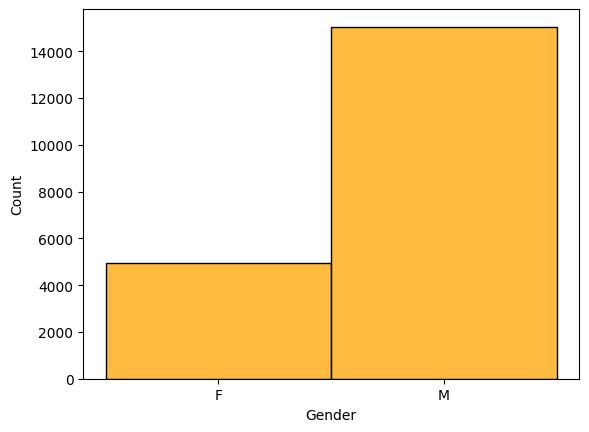

In [ ]:
sns.histplot(df['Gender'],color='orange')

In [ ]:
df.nunique()

Unnamed: 0                    20000
User_ID                        4603
Product_ID                     2676
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                       8452
dtype: int64

# Data Cleaning

In [ ]:
P2_unique_values = df.Product_Category_2.dropna().unique()
P3_unique_values = df.Product_Category_3.dropna().unique()

df['Product_Category_2'].fillna(np.random.choice(df['Product_Category_2'].dropna()), inplace=True)
df['Product_Category_3'].fillna(np.random.choice(df['Product_Category_3'].dropna()), inplace=True)

# Data Transformation

In [ ]:
df.Gender = df.Gender.replace("F", 0)
df.Gender = df.Gender.replace("M", 1)
df.Gender = df.Gender.astype("int64")

df.Stay_In_Current_City_Years = df.Stay_In_Current_City_Years.replace("4+", 4)
df.Stay_In_Current_City_Years = df.Stay_In_Current_City_Years.astype("int64")

df.Age = df.Age.replace("0-17", 17)
df.Age = df.Age.replace("18-25", 25)
df.Age = df.Age.replace("26-35", 35)
df.Age = df.Age.replace("36-45", 45)
df.Age = df.Age.replace("46-50", 50)
df.Age = df.Age.replace("51-55", 55)
df.Age = df.Age.replace("55+", 60)
df.Age = df.Age.astype("int64")

df.Product_ID = df.Product_ID.str.replace("P00", "")
df.Product_ID = df.Product_ID.astype("int64")

df.Product_Category_2 = df.Product_Category_2.fillna(0)
df.Product_Category_3 = df.Product_Category_3.fillna(0)

df = pd.get_dummies(df, columns = ["City_Category"], prefix = ["City"])

In [ ]:
df

,Unnamed: 0,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_A,City_B,City_C
0,0,1004387,10942,0,25,4,0,0,1,2.0,6.0,3862,False,True,False
1,1,1005848,183342,1,55,20,0,1,5,15.0,18.0,5339,True,False,False
2,2,1004387,8142,0,25,4,0,0,8,4.0,15.0,10078,False,True,False
3,3,1000220,110942,1,35,12,3,0,1,2.0,15.0,19493,True,False,False
4,4,1004808,10542,1,45,0,1,1,2,4.0,5.0,3361,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,1003648,35542,1,25,4,1,0,3,4.0,12.0,8197,False,True,False
19996,19996,1000092,322342,0,25,4,1,0,5,14.0,15.0,1874,False,True,False
19997,19997,1005843,183042,1,45,1,2,0,15,16.0,15.0,4412,False,False,True
19998,19998,1000355,36742,1,25,3,2,0,1,16.0,15.0,19250,False,True,False


In [ ]:
pd.DataFrame(abs(df.corr()["Purchase"]).sort_values(ascending = False)).iloc[1:]

,Purchase
Product_Category_1,0.329828
Product_Category_3,0.158536
Product_ID,0.098017
City_C,0.066435
Gender,0.061667
City_A,0.034898
City_B,0.031077
Occupation,0.029239
Product_Category_2,0.026829
Marital_Status,0.012560


In [ ]:
df.drop(["Marital_Status", "City_B"], axis = 1, inplace = True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_transformed = scaler.fit_transform(df)
df_transformed = pd.DataFrame(df_transformed)
df_transformed.columns = list(df)

<Axes: xlabel='Purchase', ylabel='Density'>

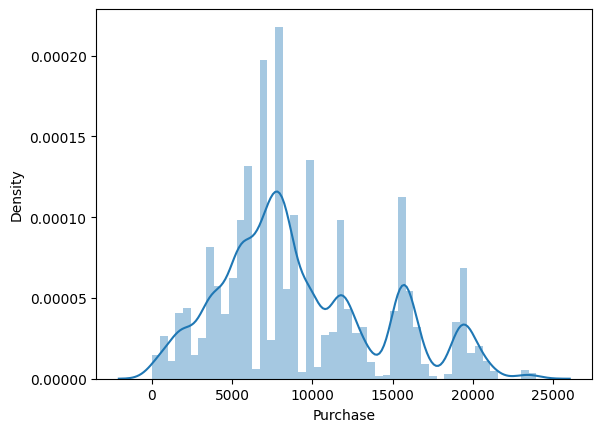

In [ ]:
sns.distplot(df['Purchase'])

<Axes: xlabel='Purchase', ylabel='Count'>

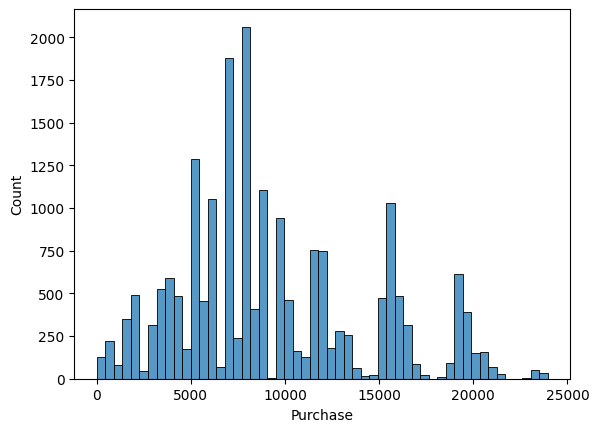

In [ ]:
sns.histplot(df['Purchase'])

<Axes: xlabel='Gender', ylabel='Density'>

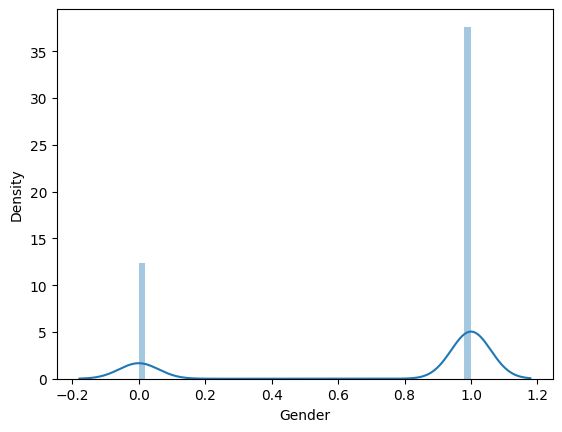

In [ ]:
sns.distplot(df['Gender'])

<Axes: >

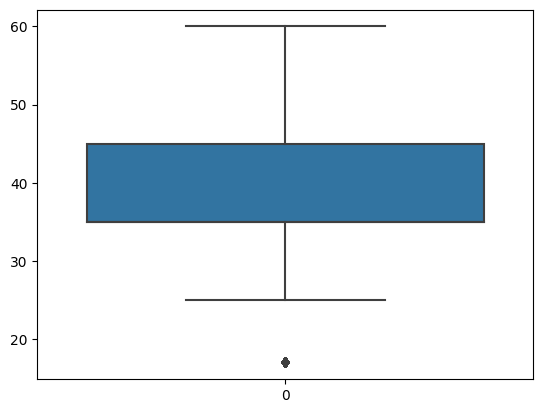

In [ ]:
sns.boxplot(df['Age'])

<Axes: xlabel='Gender', ylabel='Age'>

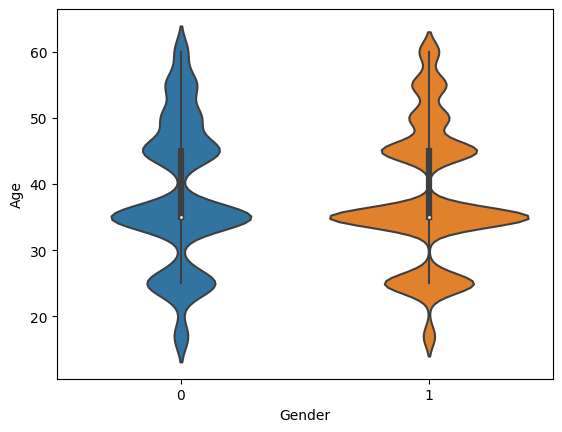

In [ ]:
sns.violinplot(x='Gender',y ='Age',data=df)

<Axes: xlabel='Gender', ylabel='Age'>

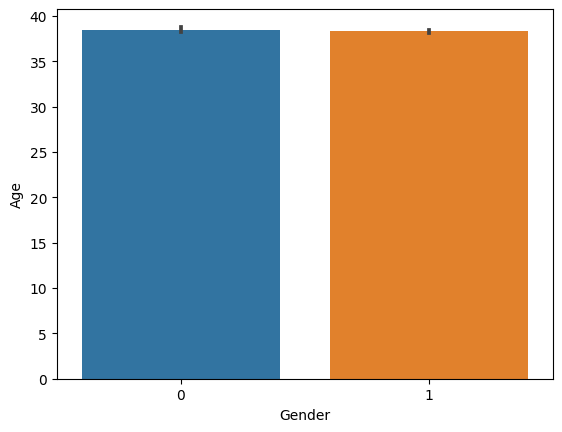

In [ ]:
sns.barplot(x='Gender',y ='Age',data=df)

In [ ]:
datacorr =df.corr()

<Axes: >

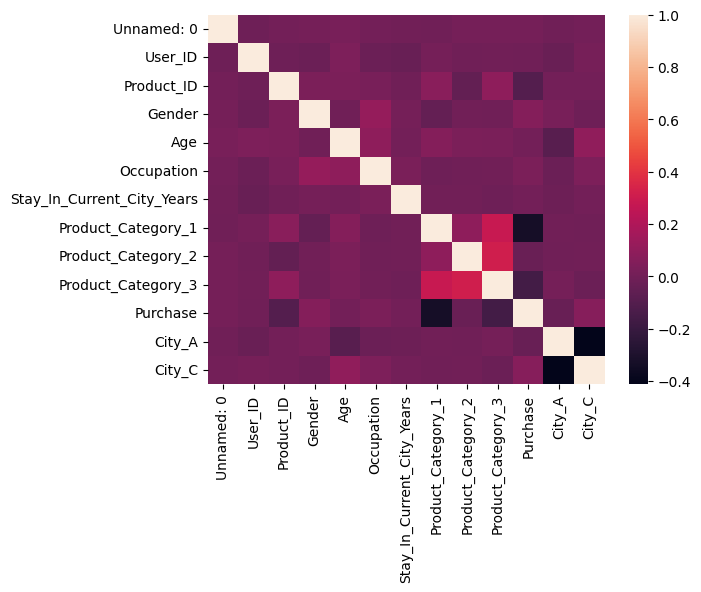

In [ ]:
sns.heatmap((datacorr))

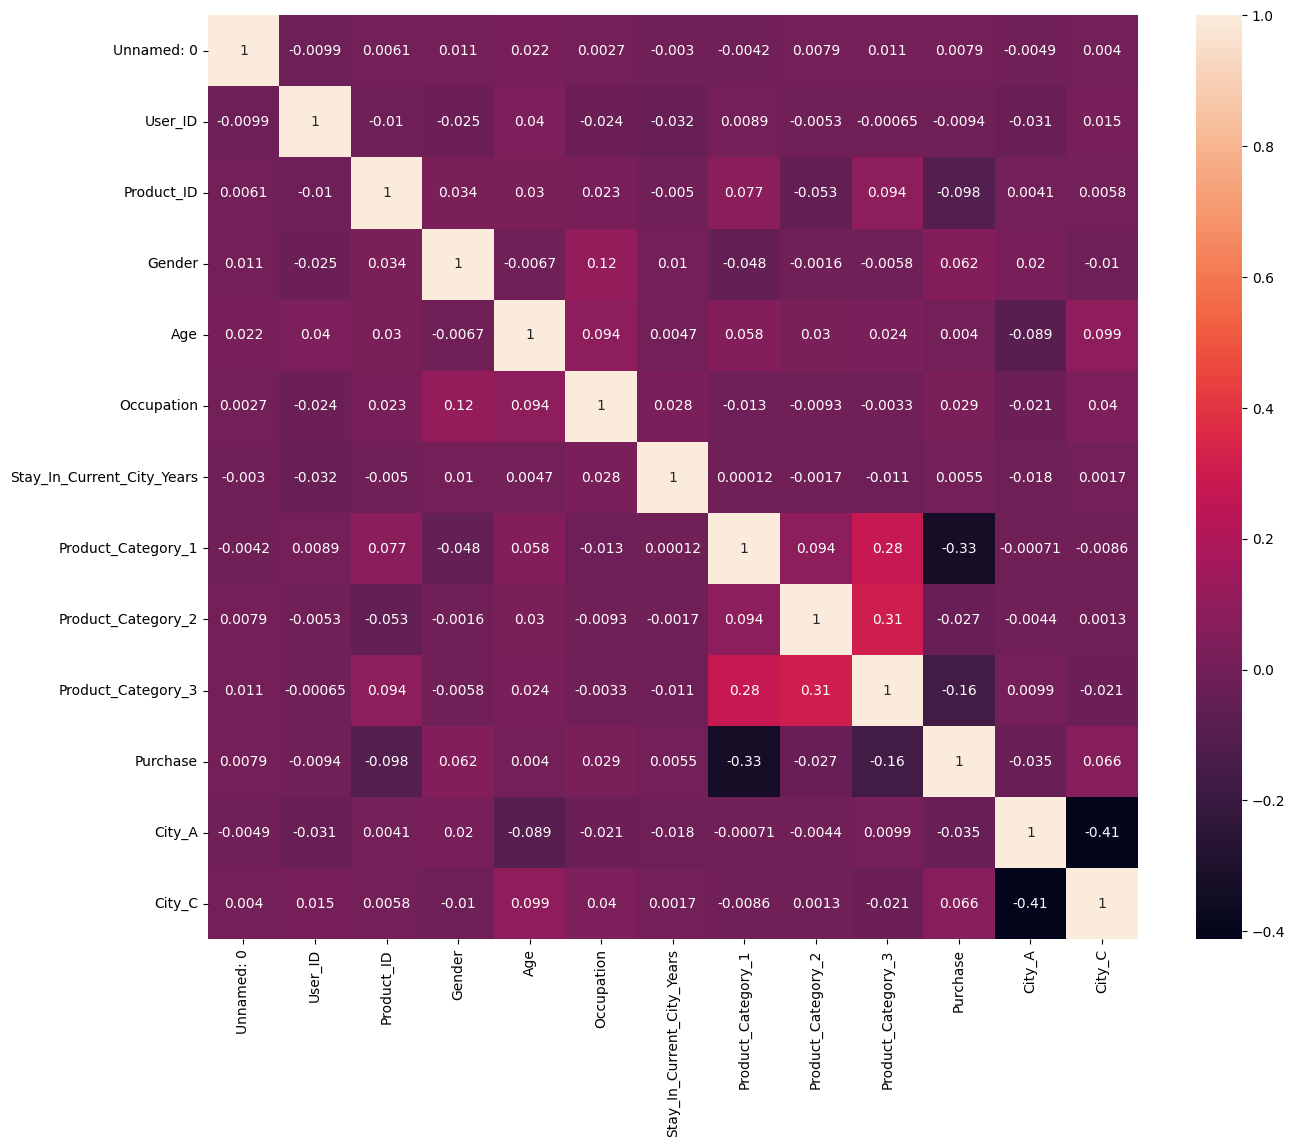

In [ ]:
plt.figure(figsize=(15,12))
sns.heatmap(datacorr,annot=True)
plt.show()

In [ ]:
x = df_transformed.drop(["Purchase"], axis = 1)
y = df["Purchase"]

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state = 0)

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,accuracy_score

# Split Model

In [ ]:
split_models = {
    'Random_Forest_1': RandomForestRegressor(),
    'Decision_tree_1': DecisionTreeRegressor(),
    'XGBoost_1': XGBRegressor()
}

In [ ]:
def eval_model(y_true, y_pred):
    
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    return mae, mse, r2

# Training Model

In [ ]:
from sklearn.metrics import mean_squared_error

def eval_model(y_true, y_pred):
    
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    return mae, mse, r2

train_test_results = {}

for model_name, model in tqdm(split_models.items(), desc='Training Models'):
    model.fit(x_train, y_train.ravel())

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    trained_data_mae, trained_data_mse, trained_data_r2 = eval_model(y_train, y_train_pred)
    test_data_mae, test_data_mse, test_data_r2 = eval_model(y_test, y_test_pred)

    train_test_results[model_name] = {
        'Train': {
            'Train_MAE': trained_data_mae,
            'Train_R2': trained_data_r2,
            'Train_mse': trained_data_mse
        },
        'Test': {
            'Test_MAE': test_data_mae,
            'Test_R2': test_data_r2,
            'Test_mse': test_data_mse
        }
    }


Training Models: 100%|███████████████████████████████████████████████████████████████████| 3/3 [00:49<00:00, 16.50s/it]


In [ ]:
print('='*80)
print('{:<25s} {:<8s} {:<8s} {:<8s} {:<8s}'.format('Model', 'Train_MAE', 'Test_MAE', 'Train_R2', 'Test_R2'))
print('='*80)
for model_name, model_results in train_test_results.items():
    print('{:<25s} {:<9.3f} {:<9.3f} {:<9.3f} {:<9.3f}'.format(
        model_name,
        model_results['Train']['Train_MAE'],
        model_results['Test']['Test_MAE'],
        model_results['Train']['Train_R2'],
        model_results['Test']['Test_R2'],
    ))
print('='*80)

Model                     Train_MAE Test_MAE Train_R2 Test_R2 
Random_Forest_1           804.367   2160.773  0.953     0.667    
Decision_tree_1           0.000     2837.371  1.000     0.378    
XGBoost_1                 1513.623  2185.924  0.841     0.664    
